Project submitted by: Antony Alder George


The Sparks Foundation

# Stock market prediction using historical data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
#Reading historic data
df = pd.read_csv('BSE_train.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-10,38130.230469,38130.230469,37802.929688,37880.398438,37880.398438,27300
1,2019-10-11,37994.480469,38345.410156,37737.851563,38127.078125,38127.078125,39400
2,2019-10-14,38208.238281,38513.691406,38066.128906,38214.468750,38214.468750,28500
3,2019-10-15,38316.488281,38635.191406,38238.269531,38506.089844,38506.089844,26200
4,2019-10-16,38637.050781,38666.378906,38416.671875,38598.988281,38598.988281,27500
...,...,...,...,...,...,...,...
215,2020-08-25,38948.460938,39008.890625,38679.671875,38843.878906,38843.878906,15700
216,2020-08-26,38930.179688,39111.550781,38765.089844,39073.921875,39073.921875,16400
217,2020-08-27,39293.531250,39326.980469,39046.941406,39113.468750,39113.468750,14500
218,2020-08-28,39264.480469,39579.578125,39235.031250,39467.308594,39467.308594,22500


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       220 non-null    object 
 1   Open       220 non-null    float64
 2   High       220 non-null    float64
 3   Low        220 non-null    float64
 4   Close      220 non-null    float64
 5   Adj Close  220 non-null    float64
 6   Volume     220 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ KB


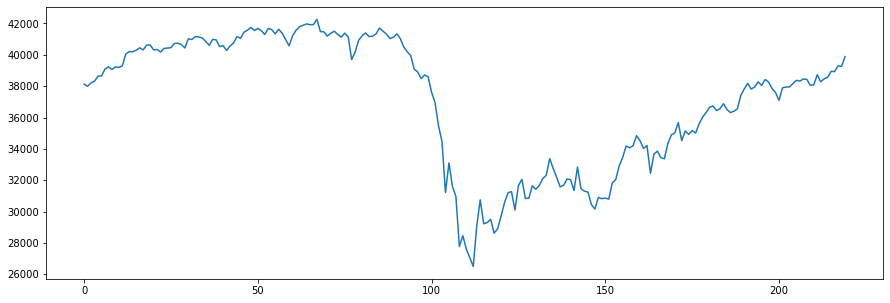

In [4]:
#Plotting the growth of SENSEX for the given period of time
df['Open'].plot(figsize=(15,5))

In [5]:
# 7 days rolling mean
df.rolling(7).mean()

,Open,High,Low,Close,Adj Close,Volume
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
215,38449.415737,38623.604353,38305.626674,38498.851005,38498.851005,17757.142857
216,38573.431362,38765.343192,38452.905134,38645.013951,38645.013951,17028.571429
217,38746.121652,38873.307478,38593.609375,38728.606585,38728.606585,17157.142857
218,38822.777344,38986.316964,38691.378348,38850.395089,38850.395089,18542.857143


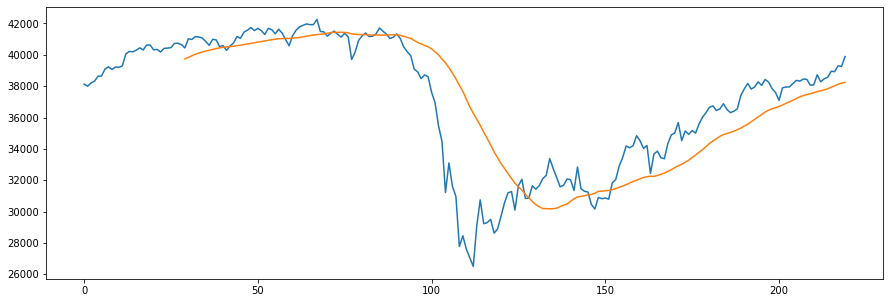

In [6]:
#Plotting rolling mean
df['Open'].plot(figsize=(15,5))
df.rolling(window=30).mean()['Close'].plot()

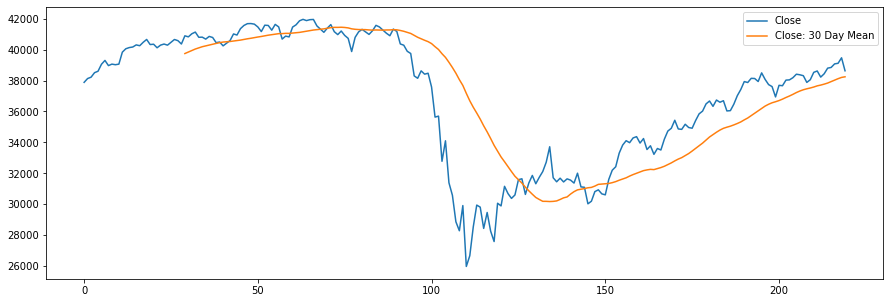

In [7]:
#Plotting 'Close' wth 7 days moving average
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(15,5))

In [8]:
training_set=df["Open"]
training_set=pd.DataFrame(training_set)

In [9]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [10]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 220):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Feature extraction

In [11]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [12]:
# Initialising the RNN
regressor = Sequential()

Training Neural Network

In [13]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [14]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
5/5 [==============================] - 1s 213ms/step - loss: 0.1944
Epoch 2/100
5/5 [==============================] - 1s 200ms/step - loss: 0.0779
Epoch 3/100
5/5 [==============================] - 1s 245ms/step - loss: 0.0524
Epoch 4/100
5/5 [==============================] - 1s 225ms/step - loss: 0.0440
Epoch 5/100
5/5 [==============================] - 1s 233ms/step - loss: 0.0426
Epoch 6/100
5/5 [==============================] - 1s 259ms/step - loss: 0.0430
Epoch 7/100
5/5 [==============================] - 1s 262ms/step - loss: 0.0360
Epoch 8/100
5/5 [==============================] - 1s 244ms/step - loss: 0.0363
Epoch 9/100
5/5 [==============================] - 1s 239ms/step - loss: 0.0318
Epoch 10/100
5/5 [==============================] - 1s 171ms/step - loss: 0.0300
Epoch 11/100
5/5 [==============================] - 1s 195ms/step - loss: 0.0309
Epoch 12/100
5/5 [==============================] - 1s 169ms/step - loss: 0.0297
Epoch 13/100
5/5 [===================

In [15]:
df_test = pd.read_csv('BSE_test.csv')
df_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-01,38754.000000,39226.820313,38542.109375,38900.800781,38900.800781,22000
1,2020-09-02,38892.640625,39141.839844,38736.218750,39086.031250,39086.031250,17100
2,2020-09-03,39165.800781,39236.359375,38943.429688,38990.941406,38990.941406,9200
3,2020-09-04,38325.000000,38729.660156,38249.769531,38357.179688,38357.179688,15400
4,2020-09-07,38284.781250,38519.921875,38060.738281,38417.230469,38417.230469,12500
5,2020-09-08,38498.070313,38746.480469,38275.449219,38365.351563,38365.351563,11900
6,2020-09-09,37988.558594,38252.671875,37935.261719,38193.921875,38193.921875,14000
7,2020-09-10,38516.878906,38878.250000,38367.070313,38840.320313,38840.320313,16500
8,2020-09-11,38865.171875,38978.519531,38711.800781,38854.550781,38854.550781,11400
9,2020-09-14,39073.511719,39230.160156,38573.171875,38756.628906,38756.628906,14700


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       28 non-null     object 
 1   Open       28 non-null     float64
 2   High       28 non-null     float64
 3   Low        28 non-null     float64
 4   Close      28 non-null     float64
 5   Adj Close  28 non-null     float64
 6   Volume     28 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.7+ KB


In [17]:
df_test["Date"] = df_test["Date"].str.replace('-', '').astype(float)

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       28 non-null     float64
 1   Open       28 non-null     float64
 2   High       28 non-null     float64
 3   Low        28 non-null     float64
 4   Close      28 non-null     float64
 5   Adj Close  28 non-null     float64
 6   Volume     28 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 1.7 KB


In [19]:
df_test["Volume"] = df_test["Volume"].astype(float)

In [20]:
test_set=df_test['Open']
test_set=pd.DataFrame(test_set)

In [21]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    28 non-null     float64
dtypes: float64(1)
memory usage: 352.0 bytes


In [22]:
df_total = pd.concat((df['Open'], df_test['Open']), axis = 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [23]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


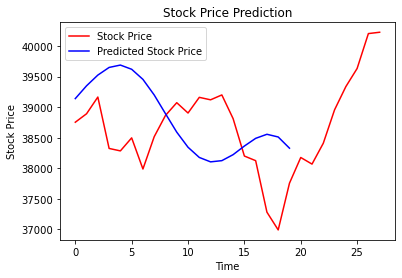

In [27]:
real_stock_price = df_test.iloc[:, 1:2].values
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()